In [ ]:
!pip install yfinance


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [ ]:
stock = "AAPL"

data = yf.download(stock, start="2015-01-01", end="2024-12-31")

data = data[["Close"]]

data.head()


/tmp/ipython-input-3438988202.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.214891
2015-01-05,23.532724
2015-01-06,23.534939
2015-01-07,23.864946
2015-01-08,24.781893


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)


In [ ]:
X = []
y = []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2455, 60, 1)
y shape: (2455,)


In [ ]:
split = int(0.8 * len(X))

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]


In [ ]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - loss: 0.0185
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0011
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0012
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0011
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 9.1619e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 8.3615e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 9.4935e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 8.9874e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 9.3024e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 7.1632e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 7.9707e-04
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 6.9702e-04
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 7.2886e-04
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 6.3309e-04
Epoch 15/20
62/62 ━━━━━━━━━━━

In [ ]:
predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [ ]:
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
r2 = r2_score(y_test_actual, predictions)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 9.831844166679927
RMSE: 11.324723999153823
R2 Score: 0.8227197833954127


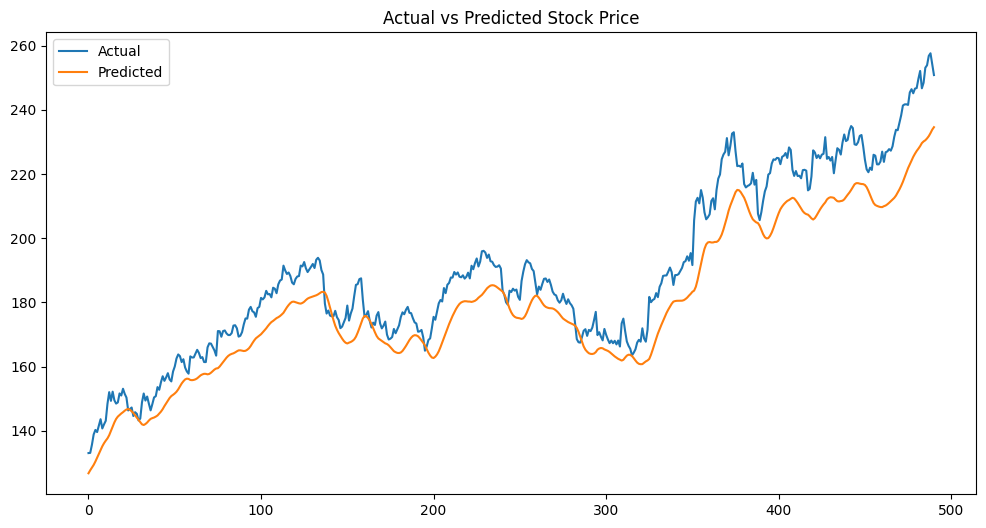

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Stock Price")
plt.show()

In [ ]:
future_days = 7
last_60_days = scaled_data[-60:]
future_predictions = []

current_batch = last_60_days.reshape(1,60,1)

for i in range(future_days):
    next_pred = model.predict(current_batch)[0]
    future_predictions.append(next_pred)
    current_batch = np.append(current_batch[:,1:,:],[[next_pred]],axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

print("Next 7 Days Prediction:")
print(future_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Next 7 Days Prediction:
[[234.8706 ]
 [233.59102]
 [231.40782]
 [228.6684 ]
 [225.61807]
 [222.4222 ]
 [219.18872]]


In [ ]:
today_price = float(data["Close"].values[-1])
tomorrow_pred = float(future_predictions.flatten()[0])

if tomorrow_pred > today_price:
    signal = "BUY"
else:
    signal = "SELL"

print("Today's Price:", today_price)
print("Tomorrow Prediction:", tomorrow_pred)
print("Signal:", signal)


Today's Price: 250.82977294921875
Tomorrow Prediction: 234.87060546875
Signal: SELL


/tmp/ipython-input-635964684.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  today_price = float(data["Close"].values[-1])
